In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import string
import re
import spacy 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /Users/loan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/loan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('../data/combined_news.csv')
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

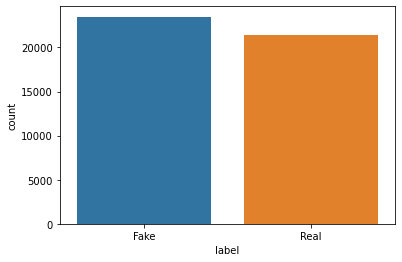

In [3]:
sns.countplot(data['label'])

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    44898.000000
mean       415.760412
std        361.648003
min          1.000000
25%        208.000000
50%        371.000000
75%        525.000000
max       8436.000000
Name: length, dtype: float64

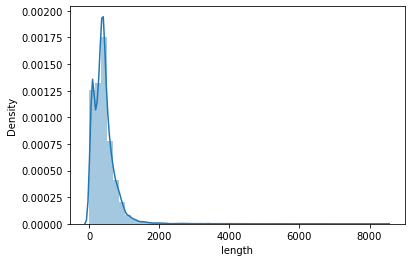

In [4]:
data['length'] = data['text'].apply(lambda x: len(x.split(' ')))
sns.distplot(data['length'])
data['length'].describe()

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
# main tokenizing function
def tokenize_line(line, chars_to_exclude, stopwords, tokenizer, stem_tokens=False, stemmer=None, lemm_tokens=False, lemmatizer=None):
    # removing unwanted characters and numbers from the string
    pattern = '[' + '|'.join(list(chars_to_exclude)) + '|\d]*'
    line = re.sub(pattern, "", line).lower()

    # generating tokens
    tokens = [token for token in tokenizer.tokenize(line) if token not in stopwords]
    
    # stemming the tokens if the user wants to
    if stem_tokens:
        tokens = [stemmer.stem(token) for token in tokens]

    # lemmatizing the tokens if the user wants to
    if lemm_tokens:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [7]:
# function to help with tokenizing columns
def tokenize_lines(lines, chars_to_exclude, stopwords, tokenizer=None, stem_tokens=False, stemmer=None, lemm_tokens=False, lemmatizer=None):

    all_tokens = [tokenize_line(line, chars_to_exclude, stopwords, tokenizer, stem_tokens, stemmer, lemm_tokens, lemmatizer) for line in lines]

    return np.array(all_tokens)

In [8]:
# the default parameters for now
def get_default_tokenization_params():
    chars_to_exclude = string.punctuation
    english_stopwords = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer("\w+")

    #Modify these according to the user's choices
    stem_tokens = False
    stemmer = PorterStemmer()

    lemm_tokens = True
    lemmatizer = WordNetLemmatizer()

    return (chars_to_exclude, english_stopwords, tokenizer, stem_tokens, stemmer, lemm_tokens, lemmatizer)

In [11]:

#To-Do: Brush up the following code to highlight the top topics discussed in the data sets: 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import pyLDAvis.sklearn

X = tokenize_lines(data['text'], *get_default_tokenization_params())
Y = data['label']
data_processed = pd.DataFrame(({'title': data['title'], 'text': X, 'label': Y}))


# Subsequent section attempts to perform some Topic Modeling using LDA 

# This section focuses on real news
real_news = data_processed[data_processed['label'] == 'Real']
num_topics = 10 
num_features = 100
'''
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_pipeline = Pipeline([('vectorizer', vectorizer), ('lda', lda)])

pyLDAvis.enable_notebook()
data_vectorized = vectorizer.fit_transform(data_processed['text'])
dash = pyLDAvis.sklearn.prepare(lda_pipeline.steps[1][1], data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(dash, 'real_news_lda.html')

# Repeat the above for fake news

'''


/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


"\nvectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')\nlda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)\nlda_pipeline = Pipeline([('vectorizer', vectorizer), ('lda', lda)])\n\npyLDAvis.enable_notebook()\ndata_vectorized = vectorizer.fit_transform(data_processed['text'])\ndash = pyLDAvis.sklearn.prepare(lda_pipeline.steps[1][1], data_vectorized, vectorizer, mds='tsne')\npyLDAvis.save_html(dash, 'real_news_lda.html')\n\n# Repeat the above for fake news\n\n"

In [24]:
realtext= real_news['text']

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#Gensim library for additional topic modeling and statistical anlysis
#corpora module implements dictionary-mapping btwn words and corresponding int IDs
from gensim import corpora

real_gensim_dictionary = corpora.Dictionary(realtext)
#creating bag of words (bow) w/ realtext
real_gensim_corpus = [real_gensim_dictionary.doc2bow(token, allow_update=True) for token in realtext]

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
import pickle
#saving dictionary and bow (via pickle )to use for predictions below
filename1 = 'real_gensim_corpus.pkl'
pickle.dump(real_gensim_corpus, open(filename1, 'wb'))
real_gensim_dictionary.save('real_gensim_dictionary.gensim')

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
import gensim
#creating LDA Model
#takes v long to load
real_lda_model = gensim.models.ldamodel.LdaModel(real_gensim_corpus, num_topics=num_topics, id2word=real_gensim_dictionary, passes=10)
real_lda_model.save('real_gensim_model.gensim')

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#printing 5 words per topic
topics = real_lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.037*"oil" + 0.027*"energy" + 0.022*"power" + 0.019*"climate" + 0.018*"gas"')
(1, '0.021*"court" + 0.016*"said" + 0.012*"law" + 0.011*"state" + 0.011*"right"')
(2, '0.030*"said" + 0.013*"police" + 0.011*"people" + 0.009*"reuters" + 0.008*"year"')
(3, '0.024*"said" + 0.014*"russian" + 0.012*"russia" + 0.010*"reuters" + 0.010*"investigation"')
(4, '0.013*"said" + 0.012*"year" + 0.012*"percent" + 0.009*"company" + 0.009*"would"')
(5, '0.057*"trump" + 0.045*"u" + 0.027*"said" + 0.020*"president" + 0.016*"washington"')
(6, '0.022*"said" + 0.011*"north" + 0.009*"korea" + 0.009*"minister" + 0.009*"would"')
(7, '0.017*"party" + 0.016*"said" + 0.015*"election" + 0.013*"trump" + 0.007*"vote"')
(8, '0.021*"republican" + 0.017*"said" + 0.017*"would" + 0.016*"bill" + 0.016*"house"')
(9, '0.024*"said" + 0.013*"state" + 0.009*"government" + 0.008*"military" + 0.008*"force"')


/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#Evaluating LDA: Topic Coherence
#Perplexitiy: -8.169369315206076 (low)
#Coherence: 0.4601994449293338 (high)
#Perplexity is low and coherence is high which is expected as this is real news(?)

from gensim.models import CoherenceModel

coherence_score_lda = CoherenceModel(model=real_lda_model, texts=realtext, dictionary=real_gensim_dictionary, coherence='c_v')
coherence_score = coherence_score_lda.get_coherence()

print('\nPerplexity:', real_lda_model.log_perplexity(real_gensim_corpus))
print('\nCoherence Score:', coherence_score)

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

Perplexity: -8.169367108432043

Coherence Score: 0.4600815070770472


In [29]:
#Topic Modeling Visualization

real_gensim_dictionary = gensim.corpora.Dictionary.load('real_gensim_dictionary.gensim')
real_gensim_corpus = pickle.load(open(filename1, 'rb'))
real_lda_model = gensim.models.ldamodel.LdaModel.load('real_gensim_model.gensim')

import pyLDAvis.gensim_models

lda_visualization = pyLDAvis.gensim_models.prepare(real_lda_model, real_gensim_corpus, real_gensim_dictionary, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_visualization)

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#Same as above but for fake news
fake_news = data_processed[data_processed['label'] == 'Fake']
faketext = fake_news['text']

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
fake_gensim_dictionary = corpora.Dictionary(faketext)
#creating bag of words (bow) w/ realtext
fake_gensim_corpus = [fake_gensim_dictionary.doc2bow(token, allow_update=True) for token in faketext]

#pickling useful for efficiently storing data to be used later
filename2 = 'fake_gensim_corpus.pkl'
pickle.dump(fake_gensim_corpus, open(filename2, 'wb'))
fake_gensim_dictionary.save('fake_gensim_dictionary.gensim')

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
fake_lda_model = gensim.models.ldamodel.LdaModel(fake_gensim_corpus, num_topics=num_topics, id2word=fake_gensim_dictionary, passes=10)
fake_lda_model.save('fake_gensim_model.gensim')

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
"""topics = fake_lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)"""

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'topics = fake_lda_model.print_topics(num_words=5)\nfor topic in topics:\n    print(topic)'

In [34]:
coherence_score_lda = CoherenceModel(model=fake_lda_model, texts= faketext, dictionary=fake_gensim_dictionary, coherence='c_v')
coherence_score = coherence_score_lda.get_coherence()

print('\nPerplexity:', fake_lda_model.log_perplexity(fake_gensim_corpus))
print('\nCoherence Score:', coherence_score)

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'CoherenceModel' is not defined

In [35]:
"""fake_gensim_dictionary = gensim.corpora.Dictionary.load('fake_gensim_dictionary.gensim')
fake_gensim_corpus = pickle.load(open(filename2, 'rb'))
fake_lda_model = gensim.models.ldamodel.LdaModel.load('fake_gensim_model.gensim')

import pyLDAvis.gensim_models

lda_visualization = pyLDAvis.gensim_models.prepare(fake_lda_model, fake_gensim_corpus, fake_gensim_dictionary, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_visualization)"""

/Users/loan/anaconda3/envs/cs152/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
'''
Defining and Training the Model: 
There will be several different types of sequential operations and layers: 

1. A tokenizer to transform each article into a vector of tokens
2. A word embedding layer that learns an embedding vector. 
3. A 1D convolutional and max-pooling layer -- this is to calculate the largest value in each feature map
4. LSTM (Long Short-Term Memory) units: this will form the recurrent part ofn the recurrent convolutional neural network. 
'''

# First step is to import all of the necessary libraries for this experiment

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout